In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# load metadata
metadata = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/inputs/metadata_stool.tsv", sep='\t')
metadata = metadata.iloc[1:]
metadata.set_index('#SampleID', inplace=True)
metadata

,Label,Plate,Position,Patient,Age,Sex,Height,Weight,BMI,BMI_category,...,Response_scale3_Start_end,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38
#SampleID,,,,,,,,,,,,,,,,,,,,,
1_BA_1,1_BA_1,B1,A1,P1,25,F,170,77,26.6,overweight,...,baseline_start,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0
1_BA_2,1_BA_2,B1,B1,P1,25,F,170,77,26.6,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_2
1_BA_3,1_BA_3,B1,C1,P1,25,F,170,78,27,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_8
1_BA_4,1_BA_4,B1,D1,P1,25,F,170,79,27.3,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_14
1_BA_5,1_BA_5,B1,E1,P1,25,F,170,80,27.7,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mock_4_DNA,mock_4_DNA,B2,B12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21_PP_8_ADA,21_PP_8_ADA,B2,E12,P21_ADA,25,F,165,64,23.5,normal,...,NaN,CD_NA,NaN,NaN,NaN,NaN,CD_NA,NaN,NaN,CD_NA
P72_DM_7,P72_DM_7,B2,F12,P72,34,F,175,56,18.3,underweight,...,full_response_end,CD_response_end,inactive_end,remission_end,response_end,full_response_end,CD_response_end,inactive_end,remission_end,CD_week_38


In [3]:
# load shannon diversity values
shannon = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Large_cohort/alpha/shannon.tsv", sep='\t')
shannon = shannon.iloc[1:]
shannon.set_index('SampleID', inplace=True)

# load shannon diversity values at baseline
shannon_bsln = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Baseline_all/alpha/shannon-tabulated.tsv", sep='\t')
shannon_bsln = shannon_bsln.iloc[1:]
shannon_bsln.set_index('SampleID', inplace=True)


In [4]:
# load the pca
pca = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Large_cohort/beta/bray_curtis_pca.tsv", sep='\t')
pca.set_index('SampleID', inplace=True)
# merge pca with metadata
df1 = pca.merge(metadata, how='inner', left_index=True, right_index=True)
# merge shannon with metadata
df1 = df1.merge(shannon, how='inner', left_index=True, right_index=True)
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38,Shannon_entropy
1_BA_1,-0.339922,-0.019602,-0.132027,-0.034146,-0.200250,0.102058,-0.131163,-0.045647,-0.047801,-0.128848,...,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0,5.245601555
1_BA_2,-0.371998,-0.028865,-0.143101,-0.077103,-0.219949,0.052181,-0.104057,-0.094711,-0.051412,-0.123341,...,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_2,5.328261504
1_BA_3,-0.361745,-0.076593,-0.062251,-0.084620,-0.157093,-0.035391,-0.102299,-0.081830,-0.070692,-0.162539,...,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_8,5.230081928
1_BA_4,-0.318537,-0.145561,0.017882,-0.037790,-0.176049,-0.086795,-0.114886,-0.017871,-0.082229,-0.173927,...,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_14,4.206164775
1_BA_5,-0.372312,-0.088283,-0.095739,-0.167484,-0.274762,-0.034003,-0.047559,-0.073851,-0.055242,-0.052029,...,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_22,4.908037192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P78_BL_8,0.092146,0.032443,-0.121075,-0.156797,0.127035,0.019383,0.003879,-0.080598,0.062825,0.018457,...,CD_response_end,inactive_end,remission_end,response_end,full_response_end,CD_response_end,inactive_end,remission_end,CD_week_38,6.070990062
P79_MM_1,0.059865,0.010396,0.203160,0.099886,-0.037175,0.012783,-0.060897,-0.057565,0.070946,0.121467,...,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_x,5.613115942
P80_KA_1,-0.299316,0.094477,-0.024094,-0.159167,-0.018541,-0.041037,0.004698,-0.034588,0.101269,0.175935,...,CD_response_start,active_start,moderate_start,response_start,baseline_start,CD_response_start,active_start,moderate_start,CD_week_0,5.015685951
P80_KA_2,-0.255702,0.081687,-0.075913,-0.145041,-0.030092,-0.061112,-0.045719,-0.004227,0.070912,0.132420,...,CD_no_response_NA,active_NA,moderate_NA,no_response_NA,no_response_NA,CD_no_response_NA,active_NA,moderate_NA,CD_week_2,5.072972226


In [5]:
# merge shannon with metadata at baseline
df2 = metadata.merge(shannon_bsln, how='inner', left_index=True, right_index=True)
df2

,Label,Plate,Position,Patient,Age,Sex,Height,Weight,BMI,BMI_category,...,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38,Shannon_entropy
3_PK_1,3_PK_1,B1,A2,P3,21,F,167,63,22.6,normal,...,CD_response_start,inactive_start,remission_start,response_start,baseline_start,CD_response_start,inactive_start,remission_start,CD_week_0,5.382086
K42_Z92_1,K42_Z92_1,B1,C2,HC42,27,F,160,50,19.5,normal,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,6.561350
5_VJ_1,5_VJ_1,B1,G2,P5,33,M,180,83,25.6,overweight,...,UC_no_response_start,active_start,severe_start,no_response_start,baseline_start,UC_no_response_start,active_start,severe_start,UC_week_0,4.873368
6_HP_1,6_HP_1,B1,B3,P6,41,M,186,74,21.4,normal,...,UC_response_start,inactive_start,mild_start,response_start,baseline_start,UC_response_start,inactive_start,mild_start,UC_week_0,5.050656
7_DL_1,7_DL_1,B1,B4,P7,44,F,165,54,19.8,normal,...,CD_response_start,inactive_start,remission_start,response_start,baseline_start,CD_response_start,inactive_start,remission_start,CD_week_0,5.838977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K26_1,K26_1,B2,D11,HC26,27,M,194,81,21.5,normal,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,6.070536
K21_1,K21_1,B2,E11,HC21,33,M,187,68,19.5,normal,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,5.705446
K24_1,K24_1,B2,F11,HC24,29,M,180,67,20.7,normal,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,5.576628
K22_1,K22_1,B2,G11,HC22,51,F,161,76,29.3,overweight,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,6.629728


In [6]:
convert_dict = {'Week_num': float,
                'Visit_num': float,
                'HBI_num': float,
                'pMayo_num': float,
                'Shannon_entropy': float
               }
df1 = df1.astype(convert_dict)

In [7]:
convert_dict = {'Week_num': float,
                'Visit_num': float,
                'HBI_num': float,
                'Shannon_entropy': float
               }
df2 = df2.astype(convert_dict)

In [8]:
# modify df to load into centroid function
df1['PC1_PC2'] = df1[['PC1', 'PC2']].apply(tuple, axis=1)

srg = df1[df1["Intestinal_surgery"]=="surgery"]
no_srg = df1[(df1['Intestinal_surgery']=='no_surgery')]
hc = df1[(df1['Intestinal_surgery']=='HC')]

In [9]:
### CENTROID ###
def centroid(points: list):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    _len = len(points)
    centroid_x = sum(x_coords)/_len
    centroid_y = sum(y_coords)/_len
    return [centroid_x, centroid_y]

In [10]:
tuples_srg = []
for i in srg['PC1_PC2']:
    tuples_srg.append(i)

tuples_no_srg = []
for i in no_srg['PC1_PC2']:
    tuples_no_srg.append(i)

tuples_hc = []
for i in hc['PC1_PC2']:
    tuples_hc.append(i)
    

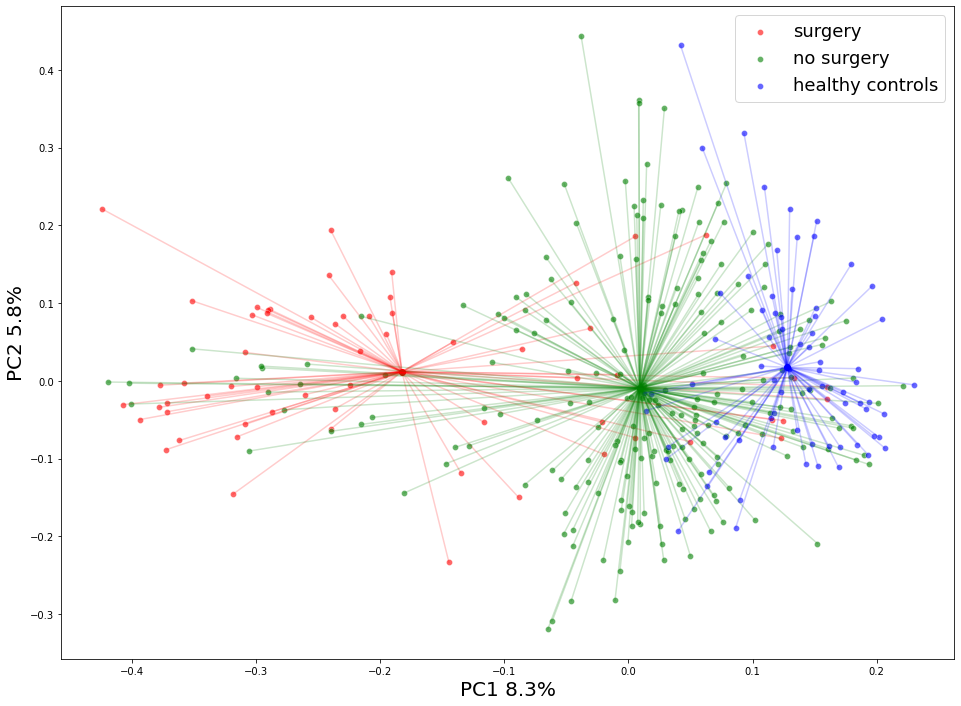

In [11]:
plot1, ax = plt.subplots(figsize=(16, 12))

# scatterplot
markers = {"norm": "o", "low": "X"}
sns.scatterplot(ax=ax, data=srg, x='PC1', y='PC2', alpha = 0.6, color='red', label='surgery')
sns.scatterplot(ax=ax, data=no_srg, x='PC1', y='PC2', alpha = 0.6, color='green', label='no surgery')
sns.scatterplot(ax=ax, data=hc, x='PC1', y='PC2', alpha = 0.6, color='blue', label='healthy controls')


# add centroids
ax.scatter(centroid(tuples_srg)[0], centroid(tuples_srg)[1], color='red')
ax.scatter(centroid(tuples_no_srg)[0], centroid(tuples_no_srg)[1], color='green')
ax.scatter(centroid(tuples_hc)[0], centroid(tuples_hc)[1], color='blue')



# plot centroid lines
for idx, val in srg.iterrows():
    x = [val.PC1, centroid(tuples_srg)[0],]
    y = [val.PC2, centroid(tuples_srg)[1]]
    plt.plot(x, y, color='red', alpha=0.2)

for idx, val in no_srg.iterrows():
    x = [val.PC1, centroid(tuples_no_srg)[0],]
    y = [val.PC2, centroid(tuples_no_srg)[1]]
    plt.plot(x, y, color='green', alpha=0.2)

for idx, val in hc.iterrows():
    x = [val.PC1, centroid(tuples_hc)[0],]
    y = [val.PC2, centroid(tuples_hc)[1]]
    plt.plot(x, y, color='blue', alpha=0.2)


    
# labels and legend
ax.set_xlabel('PC1 8.3%', fontsize=20)
ax.set_ylabel('PC2 5.8%', fontsize=20)
ax.legend(loc=1, prop={'size': 18})

# save the fig
#plot1.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Patients_relevant/Patients_bray_curtis-Surgery-pca.png')


Text(1.0, 8.158501688, 'p < 0.0001')

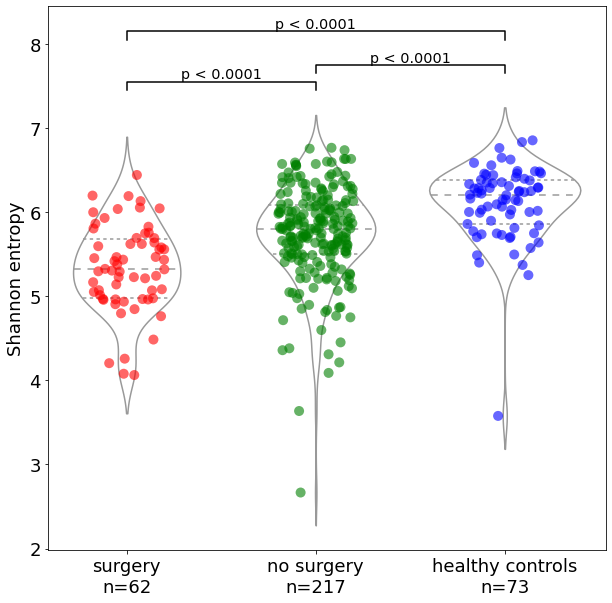

In [12]:
plot2, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(ax=ax, data=df1, x='Intestinal_surgery', y='Shannon_entropy', color='white', showfliers=False, 
               inner='quartile')
sns.stripplot(ax=ax, data=df1, x="Intestinal_surgery", y="Shannon_entropy", size=10, alpha=.6, jitter=.2, 
             palette=["red","green", "blue"])
ax.set_ylabel('Shannon entropy', fontsize=18)
ax.set_xlabel('', fontsize=18)
ax.set_xticklabels(["surgery\nn=62", "no surgery\nn=217", "healthy controls\nn=73"])
ax.tick_params(axis='both', labelsize=18)

# stat annnotation
x1, x2 = 0, 1
y, h, col = df1['Shannon_entropy'].max() + .6, .1, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "p < 0.0001", ha='center', va='bottom', color=col, fontsize='x-large')

x1, x2 = 1, 2
y, h, col = df1['Shannon_entropy'].max() + .8, .1, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "p < 0.0001", ha='center', va='bottom', color=col, fontsize='x-large')

x1, x2 = 0, 2
y, h, col = df1['Shannon_entropy'].max() + 1.2, .1, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "p < 0.0001", ha='center', va='bottom', color=col, fontsize='x-large')

#plot2.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Patients_relevant/Patients_boxplots-surgery.png')


Text(1.5, 7.558501687999999, 'p < 0.001')

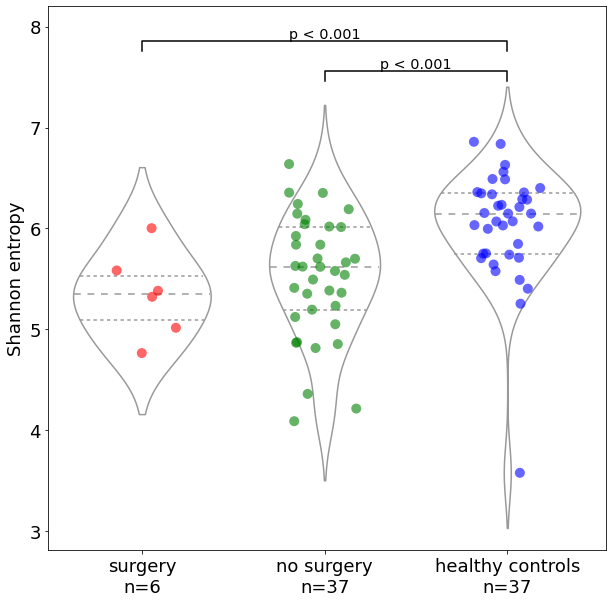

In [13]:
plot3, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(ax=ax, data=df2, x='Intestinal_surgery', y='Shannon_entropy', color='white', showfliers=False, 
               inner='quartile', order=["surgery", "no_surgery", "HC"])
sns.stripplot(ax=ax, data=df2, x="Intestinal_surgery", y="Shannon_entropy", size=10, alpha=.6, jitter=.2, 
             palette=["red","green","blue"], order=["surgery", "no_surgery", "HC"])
ax.set_ylabel('Shannon entropy', fontsize=18)
ax.set_xlabel('', fontsize=18)
ax.set_xticklabels(["surgery\nn=6", "no surgery\nn=37", "healthy controls\nn=37"])
ax.tick_params(axis='both', labelsize=18)
ax.set_ylim(ymax=8.2)

# stat annnotation
x1, x2 = 0, 2
y, h, col = df2['Shannon_entropy'].max() + .9, .1, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "p < 0.001", ha='center', va='bottom', color=col, fontsize='x-large')

x1, x2 = 1, 2
y, h, col = df2['Shannon_entropy'].max() + .6, .1, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "p < 0.001", ha='center', va='bottom', color=col, fontsize='x-large')

#plot3.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Patients_relevant/Patients_boxplots-surgery.png')

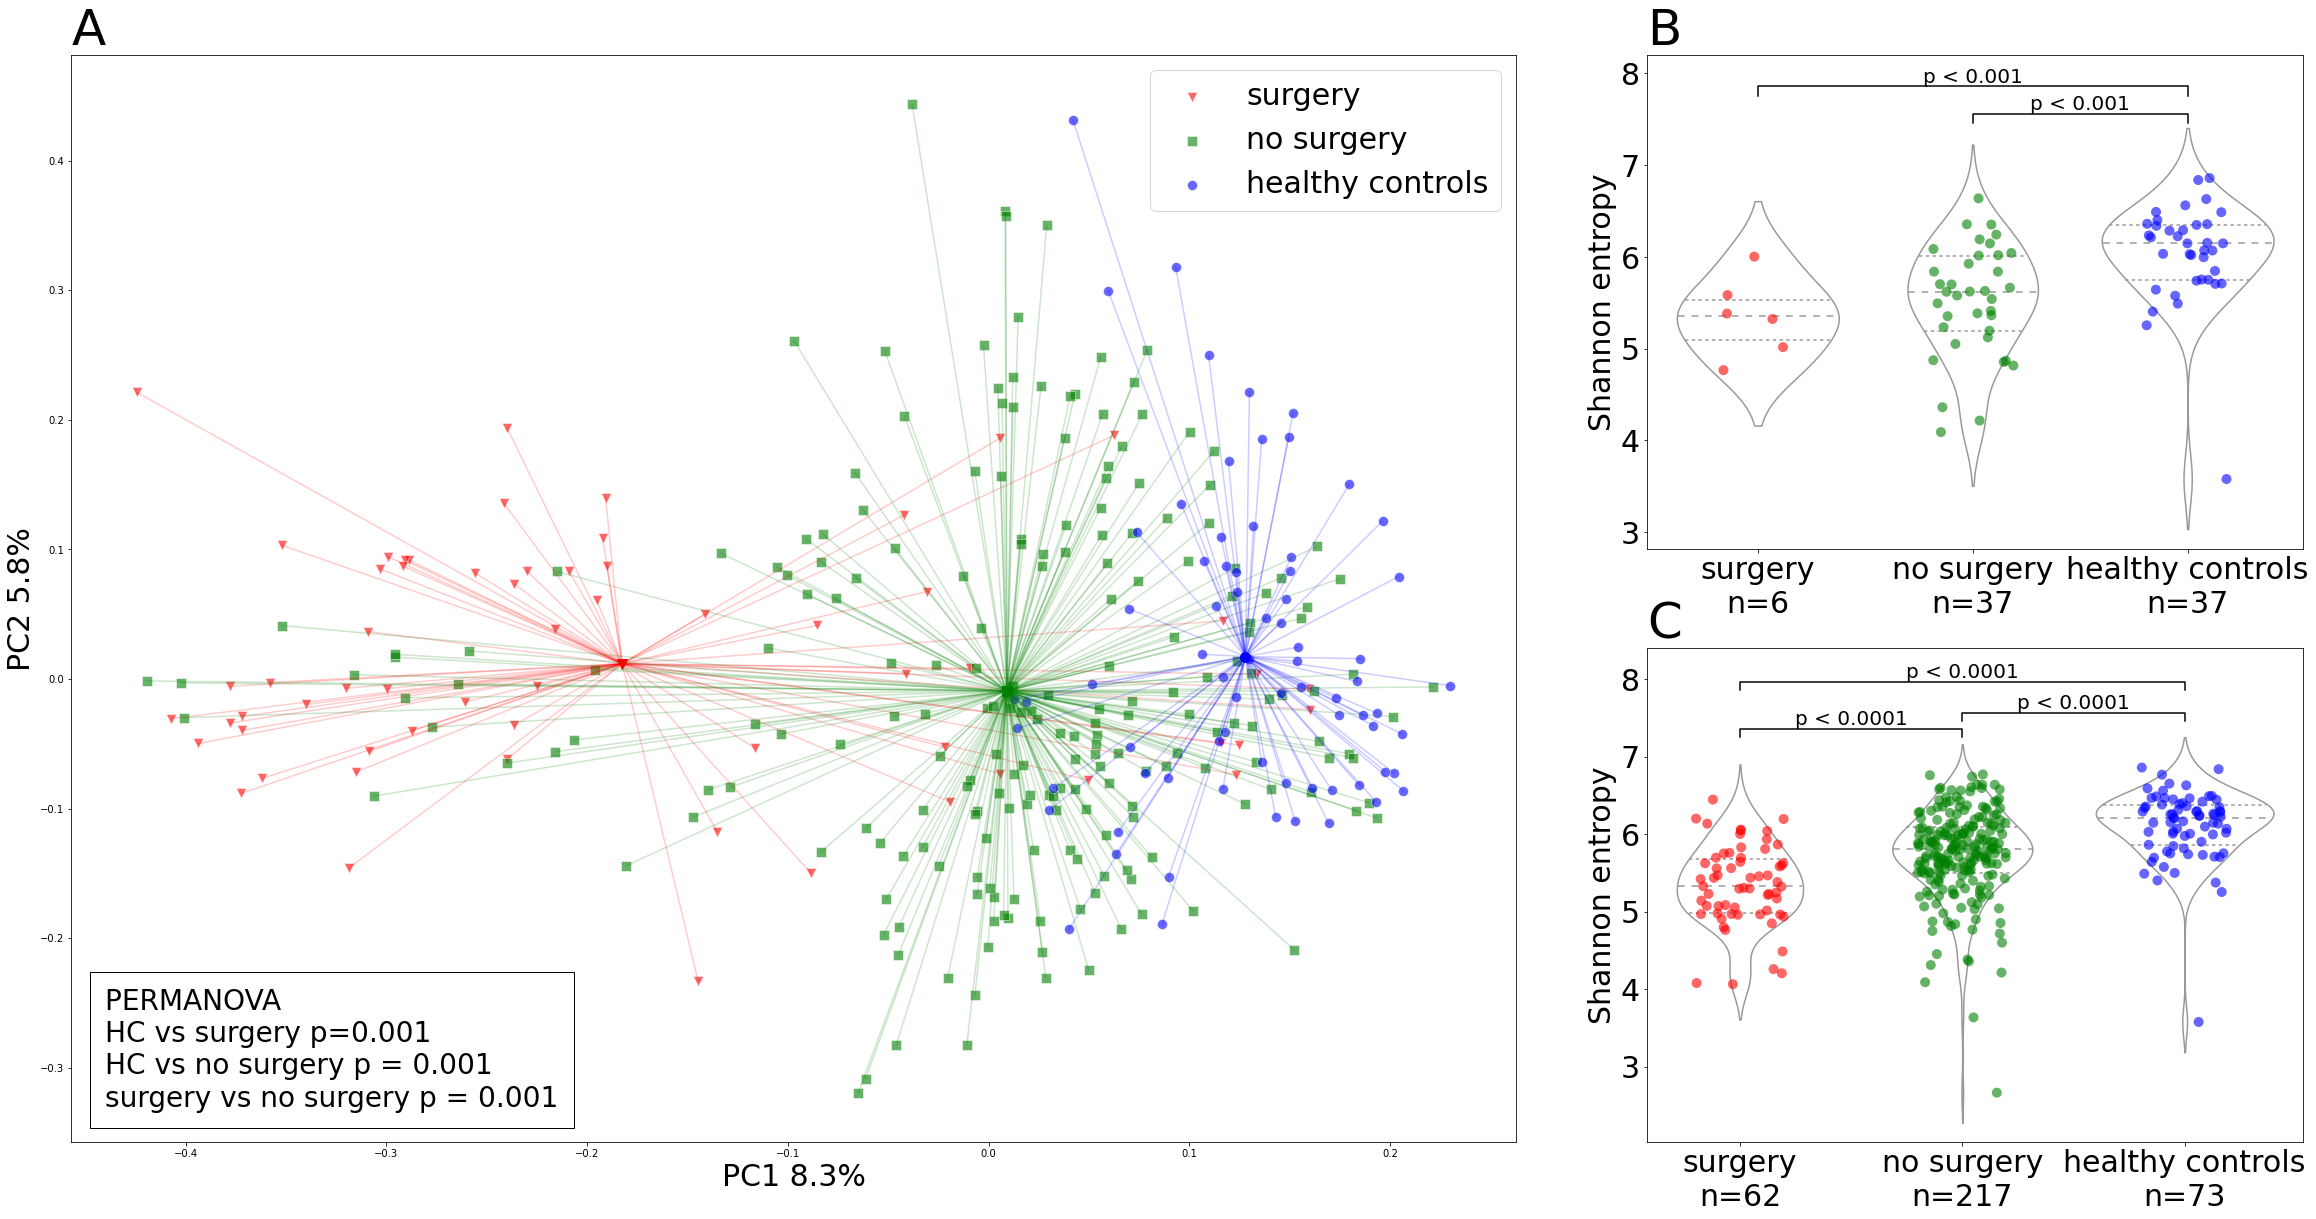

In [14]:
# create grid for subplots
plot4 = plt.figure()
plot4.set_figwidth(40)
plot4.set_figheight(20)

ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(shape=(2, 3), loc=(1, 2), colspan=1, rowspan=1)



## scatterplot ##
sns.scatterplot(ax=ax1, data=srg, x='PC1', y='PC2', alpha = 0.6, color='red', label='surgery', marker='v', s=100)
sns.scatterplot(ax=ax1, data=no_srg, x='PC1', y='PC2', alpha = 0.6, color='green', label='no surgery', marker='s', s=100)
sns.scatterplot(ax=ax1, data=hc, x='PC1', y='PC2', alpha = 0.6, color='blue', label='healthy controls', s=100)


# add centroids
ax1.scatter(centroid(tuples_srg)[0], centroid(tuples_srg)[1], color='red', marker='v', s=100)
ax1.scatter(centroid(tuples_no_srg)[0], centroid(tuples_no_srg)[1], color='green', marker='s', s=100)
ax1.scatter(centroid(tuples_hc)[0], centroid(tuples_hc)[1], color='blue', s=100)


# plot centroid lines
for idx, val in srg.iterrows():
    x = [val.PC1, centroid(tuples_srg)[0],]
    y = [val.PC2, centroid(tuples_srg)[1]]
    ax1.plot(x, y, color='red', alpha=0.2)

for idx, val in no_srg.iterrows():
    x = [val.PC1, centroid(tuples_no_srg)[0],]
    y = [val.PC2, centroid(tuples_no_srg)[1]]
    ax1.plot(x, y, color='green', alpha=0.2)

for idx, val in hc.iterrows():
    x = [val.PC1, centroid(tuples_hc)[0],]
    y = [val.PC2, centroid(tuples_hc)[1]]
    ax1.plot(x, y, color='blue', alpha=0.2)

    
# labels and legend
ax1.set_xlabel('PC1 8.3%', fontsize=30)
ax1.set_ylabel('PC2 5.8%', fontsize=30)
ax1.legend(loc=1, prop={'size': 30})
ax1.set_title("A", fontsize=50, loc='left')
ax1.text(-0.44, -0.33, 'PERMANOVA \nHC vs surgery p=0.001 \nHC vs no surgery p = 0.001 \nsurgery vs no surgery p = 0.001', bbox={'facecolor': 'white', 'pad': 15}, fontsize=28)



## violin plot at baseline ##
sns.violinplot(ax=ax2, data=df2, x='Intestinal_surgery', y='Shannon_entropy', color='white', showfliers=False, 
               inner='quartile', order=["surgery", "no_surgery", "HC"])
sns.stripplot(ax=ax2, data=df2, x="Intestinal_surgery", y="Shannon_entropy", size=10, alpha=.6, jitter=.2, 
             palette=["red","green","blue"], order=["surgery", "no_surgery", "HC"])
ax2.set_ylabel('Shannon entropy', fontsize=30)
ax2.set_xlabel('')
ax2.set_xticklabels(["surgery\nn=6", "no surgery\nn=37", "healthy controls\nn=37"])
ax2.tick_params(axis='both', labelsize=30)
ax2.set_title("B", fontsize=50, loc='left')
ax2.set_ylim(ymax=8.2)

# stat annnotation
x1, x2 = 0, 2
y, h, col = df2['Shannon_entropy'].max() + .9, .1, 'k'
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax2.text((x1+x2)*.5, y+h, "p < 0.001", ha='center', va='bottom', color=col, fontsize=20)

x1, x2 = 1, 2
y, h, col = df2['Shannon_entropy'].max() + .6, .1, 'k'
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax2.text((x1+x2)*.5, y+h, "p < 0.001", ha='center', va='bottom', color=col, fontsize=20)



## violin plot Large cohort ##
sns.violinplot(ax=ax3, data=df1, x='Intestinal_surgery', y='Shannon_entropy', color='white', showfliers=False, 
               inner='quartile')
sns.stripplot(ax=ax3, data=df1, x="Intestinal_surgery", y="Shannon_entropy", size=10, alpha=.6, jitter=.2, 
             palette=["red","green","blue"])
ax3.set_ylabel('Shannon entropy', fontsize=30)
ax3.set_xlabel('')
ax3.set_xticklabels(["surgery\nn=62", "no surgery\nn=217", "healthy controls\nn=73"])
ax3.tick_params(axis='both', labelsize=30)
ax3.set_title("C", fontsize=50, loc='left')
ax3.set_ylim(ymax=8.4)

# stat annnotation
x1, x2 = 0, 1
y, h, col = df1['Shannon_entropy'].max() + .4, .1, 'k'
ax3.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax3.text((x1+x2)*.5, y+h, "p < 0.0001", ha='center', va='bottom', color=col, fontsize=20)

x1, x2 = 1, 2
y, h, col = df1['Shannon_entropy'].max() + .6, .1, 'k'
ax3.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax3.text((x1+x2)*.5, y+h, "p < 0.0001", ha='center', va='bottom', color=col, fontsize=20)

x1, x2 = 0, 2
y, h, col = df1['Shannon_entropy'].max() + 1.0, .1, 'k'
ax3.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax3.text((x1+x2)*.5, y+h, "p < 0.0001", ha='center', va='bottom', color=col, fontsize=20)

#plt.tight_layout()

# save the fig
plot4.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Large_cohort/Shannon_and_Bray_curtis-Surgery.png')


In [15]:
x=df2[df2["Intestinal_surgery"]=="surgery"]
y=df2[df2["Intestinal_surgery"]=="no_surgery"]

In [16]:
stats.mannwhitneyu(x=x['Shannon_entropy'], y=y['Shannon_entropy'], alternative = 'two-sided')

MannwhitneyuResult(statistic=79.0, pvalue=0.26956085276486363)